In [1]:
import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt

In [2]:
# from keras.datasets import mnist as datasets
from keras.datasets import fashion_mnist as datasets
from keras.utils import np_utils
# Ejemplo one hot https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.kaggle.com%2Fdansbecker%2Fusing-categorical-data-with-one-hot-encoding&psig=AOvVaw3tlGeUdaNDigWpksOj4Arp&ust=1591750167942000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJiw8szB8-kCFQAAAAAdAAAAABAO

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Normalizar los datos de entradas entre 0 - 1
x_train = x_train/225.0
x_test = x_test/225.0

In [6]:
# Dar formato one-hot
nclases = 10
y_train = np_utils.to_categorical(y_train, nclases)
y_test = np_utils.to_categorical(y_test, nclases)

(-0.5, 27.5, 27.5, -0.5)

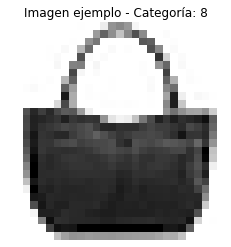

In [7]:
nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')

In [8]:
# Por defecto, Keras requiere cada dato de entrada en el formato
# nimagenes x nfilas x ncolumnas x ncanales,
# donde ncanales = 1 por ser imágenes en escala de gris.
# Se debe modificar el tamaño de x_train y x_test para cumplir
# con este requerimiento:

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# Modelo basado en Lenet
modelo = Sequential()

# Conv y Max-pooling 1
modelo.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Conv y Max-pooling 2
modelo.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar volumen
modelo.add(Flatten())

# Fully Connected y salida
modelo.add(Dense(120, activation='relu'))
modelo.add(Dense(84, activation='relu'))
modelo.add(Dense(nclases, activation='softmax'))

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [10]:
# Optimizador
sgd = SGD(learning_rate=0.1)

modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [11]:
# Entrenamiento
nepoch = 10
tam_lote = 128

history = modelo.fit(
    x_train,
    y_train,
    epochs=nepoch,
    batch_size=tam_lote,
    validation_data=(x_test, y_test),
    verbose=1
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 555us/step - loss: 0.7982 - accuracy: 0.6967 - val_loss: 0.5155 - val_accuracy: 0.8111
Epoch 2/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.4568 - accuracy: 0.8321 - val_loss: 0.4740 - val_accuracy: 0.8250
Epoch 3/10
60000/60000 [==============================] - 32s 525us/step - loss: 0.3865 - accuracy: 0.8585 - val_loss: 0.4045 - val_accuracy: 0.8534
Epoch 4/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.3548 - accuracy: 0.8694 - val_loss: 0.3689 - val_accuracy: 0.8659
Epoch 5/10
60000/60000 [==============================] - 32s 534us/step - loss: 0.3305 - accuracy: 0.8784 - val_loss: 0.3480 - val_accuracy: 0.8741
Epoch 6/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.3105 - accuracy: 0.8859 - val_loss: 0.3529 - val_accuracy: 0.8718
Epoch 7/10
60000/60000 [==============================] 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


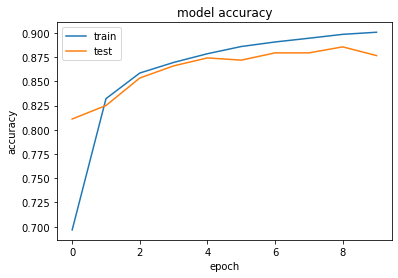

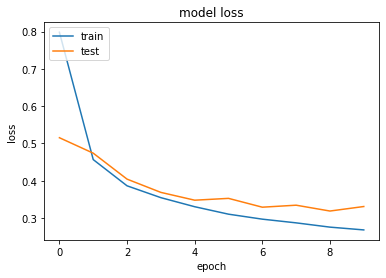

In [12]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Desempeño

from sklearn.metrics import confusion_matrix

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

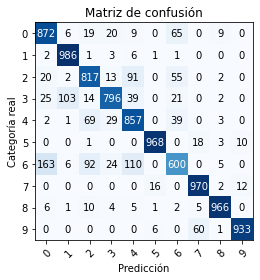

In [14]:
y_pred = modelo.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)